In [1]:
# Parse and Load Data with Marimo
import pandas as pd
import os
from korkeasaari.utils import all_excels_to_visitors_df
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
clean_csv_path = os.path.join("../data", "clean", "visitors.csv")
raw_folder_path = os.path.join("../data", "raw")

if os.path.exists(clean_csv_path):
    msg = f"""Found existing cleaned data at `{clean_csv_path}`.
    Loaded for EDA."""
    df = pd.read_csv(clean_csv_path)
    data_loaded = True
else:
    data_loaded = False
if not data_loaded:
    df = all_excels_to_visitors_df(raw_folder_path)
    os.makedirs(os.path.dirname(clean_csv_path), exist_ok=True)
    df.to_csv(clean_csv_path, index=False)
    msg = f"Saved cleaned data to `{clean_csv_path}`."

print(msg)
df.head()

Found existing cleaned data at `../data/clean/visitors.csv`.
    Loaded for EDA.


,date,visitors,day_of_week
0,2022-01-01,2316,la
1,2022-01-02,2007,su
2,2022-01-03,1310,ma
3,2022-01-04,1090,ti
4,2022-01-05,1761,ke


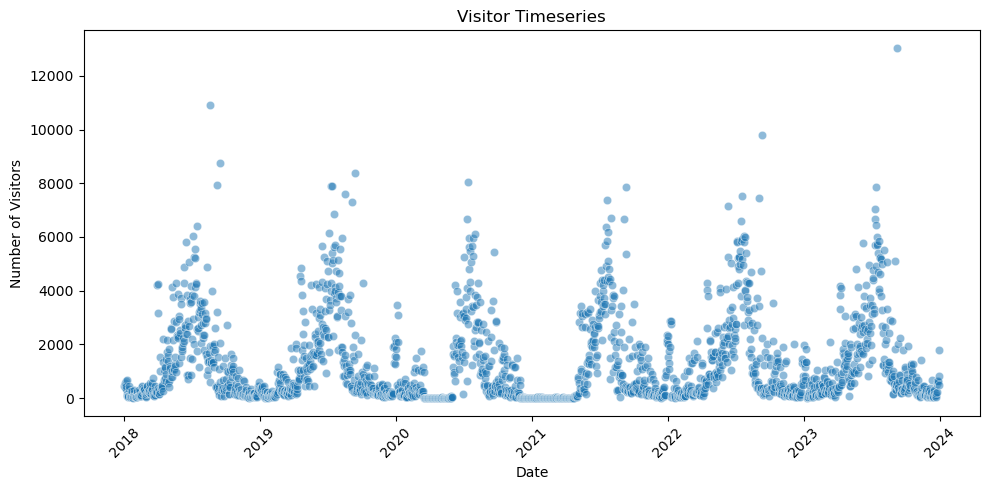

In [ ]:
df["date"] = pd.to_datetime(df["date"])
df_sorted = df.sort_values("date")

fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=df_sorted, x="date", y="visitors", alpha=0.5, ax=ax)
ax.set_title("Visitor Timeseries")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Visitors")
plt.xticks(rotation=45)
plt.tight_layout()

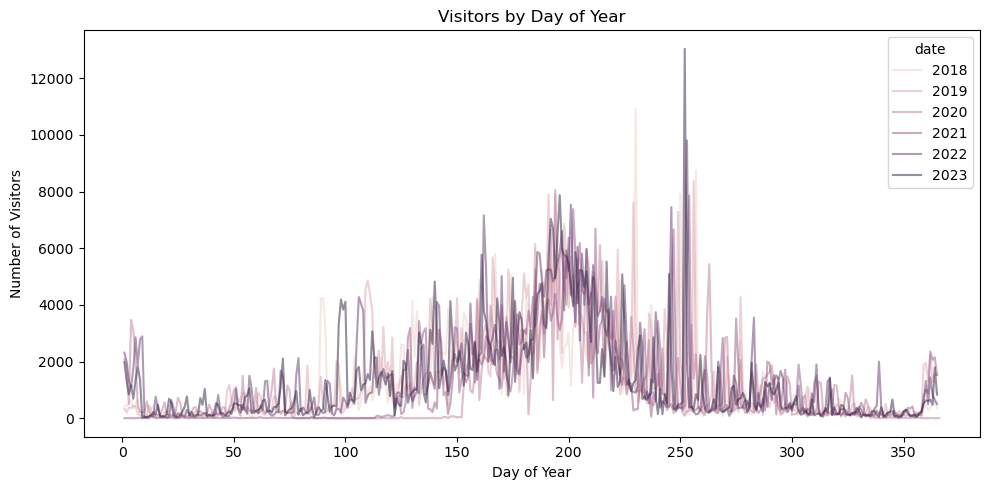

In [24]:
df_sorted["day_of_year"] = df_sorted["date"].dt.dayofyear

fig2, ax2 = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=df_sorted,
    x="day_of_year",
    y="visitors",
    hue=df_sorted["date"].dt.year,
    alpha=0.5,
    ax=ax2,
)
ax2.set_title("Visitors by Day of Year")
ax2.set_xlabel("Day of Year")
ax2.set_ylabel("Number of Visitors")
plt.tight_layout()